In [94]:
# First, we read in our dataframes and import the necessary libraries

import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import matplotlib.pyplot as plt


careerstats = pd.read_csv("../Regression Analysis/yearly_player_data.csv")

allpro12 = pd.read_excel("../Regression Analysis/allpro12.xlsx")
allpro13 = pd.read_excel("../Regression Analysis/allpro13.xlsx")
allpro14 = pd.read_excel("../Regression Analysis/allpro14.xlsx")
allpro15 = pd.read_excel("../Regression Analysis/allpro15.xlsx")
allpro16 = pd.read_excel("../Regression Analysis/allpro16.xlsx")
allpro17 = pd.read_excel("../Regression Analysis/allpro17.xlsx")
allpro18 = pd.read_excel("../Regression Analysis/allpro18.xlsx")
allpro19 = pd.read_excel("../Regression Analysis/allpro19.xlsx")
allpro20 = pd.read_excel("../Regression Analysis/allpro20.xls.xlsx")
allpro21 = pd.read_excel("../Regression Analysis/allpro21.xls.xlsx")
allpro22 = pd.read_excel("../Regression Analysis/allpro22.xls.xlsx")
allpro23 = pd.read_excel("../Regression Analysis/allpro23.xls.xlsx")

# We need one dataset of all All-Pro team data, so we concatenate the datasets from each year, then we add a column to designate that this
# was an All-Pro year, and we drop un-needed columns from our All-Pro dataset since they appear in the original data.

allpros = pd.concat([allpro12, allpro13, allpro14, allpro15, allpro16, allpro17, allpro18, allpro19, allpro20, allpro21, allpro22, allpro23])
allpros = allpros.assign(All_Pro = 1)
allpros = allpros.drop(columns=['Pos', 'Tm', 'Yrs', 'G', 'GS', 'Cmp', 'Att', 'Yds', 'TD', 'Int', 'Att.1', 'Yds.1', 'TD.1', 'Rec', 'Yds.2', 'TD.2', 'Solo', 'Sk', 'Int.1', 'All-pro teams'])

# We now merge our all pro data and our yearly player data to assign a 1 to the years in which a player made an all pro team, and fill any na values as 0
# we also drop some unneeded columns here as well

merged = careerstats.merge(allpros, left_on=['player_name', 'season'], right_on=['Player', 'Year'], how='left')

merged = merged.drop(columns=['Year', 'Player', 'vacated_receiving_air_yards', 'vacated_yards_after_catch', 'vacated_reception_td', 'vacated_rush_attempts', 'vacated_rushing_yards', 'vacated_run_td', 'vacated_touches', 'vacated_total_yards', 'vacated_receiving_yards', 'vacated_receptions', 'vacated_targets', 'vacated_interception', 'vacated_pass_td', 'vacated_passing_air_yards', 'vacated_passing_yards', 'vacated_incomplete_pass', 'vacated_complete_pass', 'vacated_pass_attempts'])
merged = merged.fillna(0)

merged = merged.drop(merged[merged['games'] <= 12].index)




#We now partition our datasets into 3 categories so that we only work with one position at a time during our analysis

rec = merged['position'].values == 'WR'
receivers = merged.loc[rec]

rb = merged['position'].values == 'RB'
rbacks = merged.loc[rb]

qb = merged['position'].values == 'QB'
quarterbacks = merged.loc[qb]

merged.head()



,team,player_id,player_name,position,season,depth,pass_attempts,complete_pass,incomplete_pass,passing_yards,...,average_yptouch,average_pass_ypg,average_rec_ypg,average_rush_ypg,average_ypg,average_ppg,injuries,career_injuries,Age,All_Pro
0,TEN,00-0035676,A.J. Brown,WR,2019,2.0,0.0,0.0,0.0,0.0,...,20.20,0.0,65.69,3.75,69.44,13.57,0.0,0.0,0.0,0.0
1,TEN,00-0035676,A.J. Brown,WR,2020,1.0,0.0,0.0,0.0,0.0,...,17.49,0.0,70.87,2.00,72.87,15.45,3.0,3.0,23.0,1.0
2,TEN,00-0035676,A.J. Brown,WR,2021,1.0,2.0,0.0,2.0,0.0,...,15.96,0.0,69.65,1.63,71.28,14.99,3.0,6.0,0.0,0.0
3,PHI,00-0035676,A.J. Brown,WR,2022,1.0,0.0,0.0,0.0,0.0,...,16.29,0.0,74.85,1.17,76.02,15.80,3.0,6.0,25.0,1.0
4,PHI,00-0035676,A.J. Brown,WR,2023,1.0,0.0,0.0,0.0,0.0,...,15.59,0.0,77.23,0.91,78.14,16.13,1.0,7.0,26.0,1.0


C:\Users\joliphant\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

     All-Pro       0.94      0.98      0.96       205
 Not All-Pro       0.64      0.43      0.51        21

    accuracy                           0.92       226
   macro avg       0.79      0.70      0.74       226
weighted avg       0.92      0.92      0.92       226



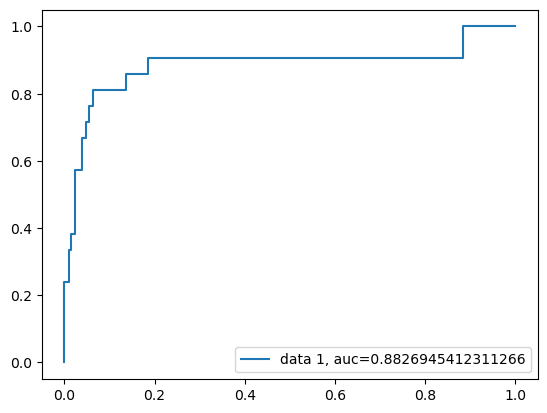


Feature Importance (Coefficient and Odds Ratio):
               Feature  Coefficient  Odds Ratio
7                 wins     0.073365    1.076123
3         reception_td     0.059054    1.060832
1      receiving_yards     0.018456    1.018628
6            draft_ovr     0.001430    1.001431
4         target_share    -0.003997    0.996011
8  receiving_air_yards    -0.005037    0.994976
2    yards_after_catch    -0.005544    0.994472
0           receptions    -0.074631    0.928086
5             yptarget    -0.875716    0.416564


In [100]:
# Now it's time to set up our Regression Models, firstly with receivers

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE



#We set our desired features, going with our intuition about which ones drive all pro team selections

rec_features = ['receptions', 'receiving_yards', 'yards_after_catch', 'reception_td', 'target_share', 'yptarget', 'draft_ovr', 'wins', 'receiving_air_yards']
rec_x = receivers[rec_features]
rec_y = receivers.All_Pro

rec_x_train, rec_x_test, rec_y_train, rec_y_test = train_test_split(rec_x, rec_y, test_size=0.25, random_state=16)

reclog = LogisticRegression(random_state=16)

reclog.fit(rec_x_train, rec_y_train)

rec_y_predict = reclog.predict(rec_x_test)

#After setting up our model, we print a classification report showing how accurate our model was at predicting certain outcomes, and we got .97

target_names = ['All-Pro', 'Not All-Pro']
print(classification_report(rec_y_test, rec_y_predict, target_names=target_names))

#We now create an AUC Curve Diagram for our predictive model, and we get an AUC score of .8, meaning our model is a decent predictor or All-Pro vs not

y_pred_proba = reclog.predict_proba(rec_x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(rec_y_test,  y_pred_proba)
auc = metrics.roc_auc_score(rec_y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#We also want to evaluate our features using cofficients and odds ratios analysis -- we see that our coefficients for the current model besides wins and
#target share and all odds ratios are around 1 except for wins and target share, this tells us we may need to change our model
#even though our model accuracy is 80%
coefficients = reclog.coef_[0]
odds_ratios = np.exp(coefficients)

feature_importance = pd.DataFrame({
    'Feature': rec_x.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})
print("\nFeature Importance (Coefficient and Odds Ratio):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))



In [101]:
#We now resort to Recursive Feature Elimination to drill down into the most important features of our model

rfe_model = LogisticRegression(max_iter=10000, solver='liblinear')
rfe = RFE(rfe_model, n_features_to_select=5)
rfe.fit(rec_x_train, rec_y_train)

rfe_features = rec_x.columns[rfe.support_]
print("\nSelected Features by RFE:")
print(rfe_features)


Selected Features by RFE:
Index(['receptions', 'receiving_yards', 'target_share', 'yptarget', 'wins'], dtype='object')


C:\Users\joliphant\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

     All-Pro       0.94      0.97      0.96       205
 Not All-Pro       0.60      0.43      0.50        21

    accuracy                           0.92       226
   macro avg       0.77      0.70      0.73       226
weighted avg       0.91      0.92      0.91       226



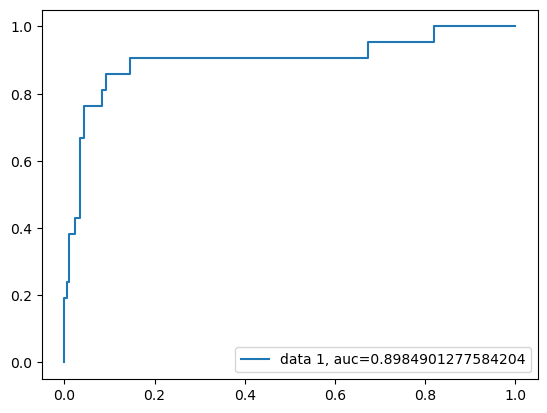


Feature Importance (Coefficient and Odds Ratio):
           Feature  Coefficient  Odds Ratio
3         yptarget     0.252448    1.287173
4             wins     0.089271    1.093377
0       receptions     0.028376    1.028783
1  receiving_yards     0.003049    1.003054
2     target_share    -1.819571    0.162095


In [102]:
#We set our desired features, removing the unwanted features

rec_features = ['receptions', 'receiving_yards', 'target_share', 'yptarget', 'wins']
rec_x = receivers[rec_features]
rec_y = receivers.All_Pro

rec_x_train, rec_x_test, rec_y_train, rec_y_test = train_test_split(rec_x, rec_y, test_size=0.25, random_state=16)

reclog = LogisticRegression(random_state=16)

reclog.fit(rec_x_train, rec_y_train)

rec_y_predict = reclog.predict(rec_x_test)

#Setting up new classification report

target_names = ['All-Pro', 'Not All-Pro']
print(classification_report(rec_y_test, rec_y_predict, target_names=target_names))

#New AUC Diagram
y_pred_proba = reclog.predict_proba(rec_x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(rec_y_test,  y_pred_proba)
auc = metrics.roc_auc_score(rec_y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#New Feature Eval, and we see that our features are now more significant and our AUC is more accurate
coefficients = reclog.coef_[0]
odds_ratios = np.exp(coefficients)

feature_importance = pd.DataFrame({
    'Feature': rec_x.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})
print("\nFeature Importance (Coefficient and Odds Ratio):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))

#We see that our model improved!


              precision    recall  f1-score   support

     All-Pro       0.95      0.97      0.96       130
 Not All-Pro       0.71      0.62      0.67        16

    accuracy                           0.93       146
   macro avg       0.83      0.80      0.81       146
weighted avg       0.93      0.93      0.93       146



C:\Users\joliphant\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


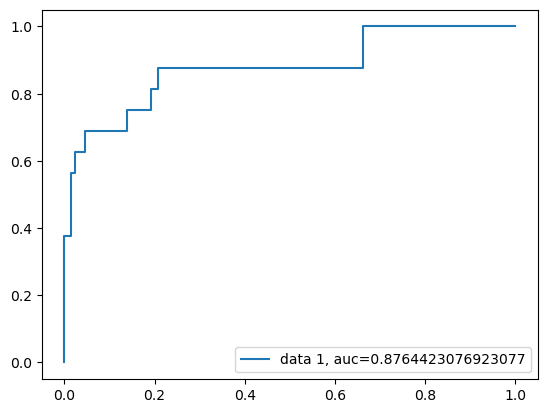


Feature Importance (Coefficient and Odds Ratio):
         Feature  Coefficient  Odds Ratio
4        yptouch     1.284051    3.611241
2      total_tds     0.238589    1.269457
1  rushing_yards     0.004680    1.004691
0        touches     0.003741    1.003748
3           wins    -0.039738    0.961042


In [105]:
#We now set up our model for running backs

run_features = ['touches', 'rushing_yards', 'total_tds', 'wins', 'yptouch']
run_x = rbacks[run_features]
run_y = rbacks.All_Pro

run_x_train, run_x_test, run_y_train, run_y_test = train_test_split(run_x, run_y, test_size=0.25, random_state=16)

runlog = LogisticRegression(random_state=16)

runlog.fit(run_x_train, run_y_train)

run_y_predict = runlog.predict(run_x_test)

#After setting up our model, we print a classification report showing how accurate our model was at predicting certain outcomes, and we got .93

target_names = ['All-Pro', 'Not All-Pro']
print(classification_report(run_y_test, run_y_predict, target_names=target_names))

#We now create an AUC Curve Diagram for our predictive model, and we get an AUC score of .87, meaning our model is a decent predictor or All-Pro vs not

y_pred_proba = runlog.predict_proba(run_x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(run_y_test,  y_pred_proba)
auc = metrics.roc_auc_score(run_y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#We also want to evaluate our features using cofficients and odds ratios analysis -- we see that our coefficients for the current model besides wins and
#target share and all odds ratios are around 1 except for yards per touch, this tells us we may need to change our model
#even though our model accuracy is 87%
coefficients = runlog.coef_[0]
odds_ratios = np.exp(coefficients)

feature_importance = pd.DataFrame({
    'Feature': run_x.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})
print("\nFeature Importance (Coefficient and Odds Ratio):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))


In [106]:
#We now resort to Recursive Feature Elimination to drill down into the most important features of our model

rfe_model = LogisticRegression(max_iter=10000, solver='liblinear')
rfe = RFE(rfe_model, n_features_to_select=5)
rfe.fit(run_x_train, run_y_train)

rfe_features = run_x.columns[rfe.support_]
print("\nSelected Features by RFE:")
print(rfe_features)

#For running backs, it did not eliminate any features!


Selected Features by RFE:
Index(['touches', 'rushing_yards', 'total_tds', 'wins', 'yptouch'], dtype='object')


              precision    recall  f1-score   support

     All-Pro       0.95      0.98      0.97        60
 Not All-Pro       0.90      0.75      0.82        12

    accuracy                           0.94        72
   macro avg       0.93      0.87      0.89        72
weighted avg       0.94      0.94      0.94        72



C:\Users\joliphant\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


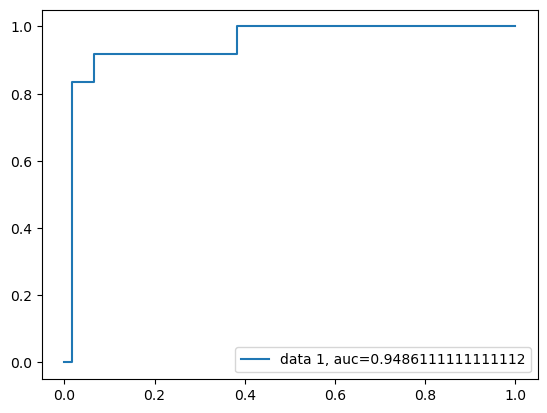


Feature Importance (Coefficient and Odds Ratio):
         Feature  Coefficient  Odds Ratio
5           wins     0.681076    1.976002
2        pass_td     0.296361    1.344956
1  passing_yards     0.003704    1.003711
0  pass_attempts    -0.021441    0.978787
4  passer_rating    -0.170302    0.843410
3   interception    -0.528972    0.589210


In [108]:
#We now set up our model for quarterbacks

qb_features = ['pass_attempts', 'passing_yards', 'pass_td', 'interception', 'passer_rating', 'wins']
qb_x = quarterbacks[qb_features]
qb_y = quarterbacks.All_Pro

qb_x_train, qb_x_test, qb_y_train, qb_y_test = train_test_split(qb_x, qb_y, test_size=0.25, random_state=16)

qblog = LogisticRegression(random_state=16)

qblog.fit(qb_x_train, qb_y_train)

qb_y_predict = qblog.predict(qb_x_test)

#After setting up our model, we print a classification report showing how accurate our model was at predicting certain outcomes, and we got .94

target_names = ['All-Pro', 'Not All-Pro']
print(classification_report(qb_y_test, qb_y_predict, target_names=target_names))

#We now create an AUC Curve Diagram for our predictive model, and we get an AUC score of .95, meaning our model is a good predictor or All-Pro vs not

y_pred_proba = qblog.predict_proba(qb_x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(qb_y_test,  y_pred_proba)
auc = metrics.roc_auc_score(qb_y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#We also want to evaluate our features using cofficients and odds ratios analysis -- we see that our coefficients for the current model besides wins and
#target share and all odds ratios are around 1 except for wins and passing td's, this tells us we may need to change our model
#even though our model accuracy is 95%
coefficients = qblog.coef_[0]
odds_ratios = np.exp(coefficients)

feature_importance = pd.DataFrame({
    'Feature': qb_x.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})
print("\nFeature Importance (Coefficient and Odds Ratio):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))


In [109]:
#We now resort to Recursive Feature Elimination to drill down into the most important features of our model

rfe_model = LogisticRegression(max_iter=10000, solver='liblinear')
rfe = RFE(rfe_model, n_features_to_select=5)
rfe.fit(qb_x_train, qb_y_train)

rfe_features = qb_x.columns[rfe.support_]
print("\nSelected Features by RFE:")
print(rfe_features)

#For quarterbacks, we eliminated passing yards as a feature


Selected Features by RFE:
Index(['pass_attempts', 'pass_td', 'interception', 'passer_rating', 'wins'], dtype='object')


              precision    recall  f1-score   support

     All-Pro       0.95      0.98      0.97        60
 Not All-Pro       0.90      0.75      0.82        12

    accuracy                           0.94        72
   macro avg       0.93      0.87      0.89        72
weighted avg       0.94      0.94      0.94        72



C:\Users\joliphant\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


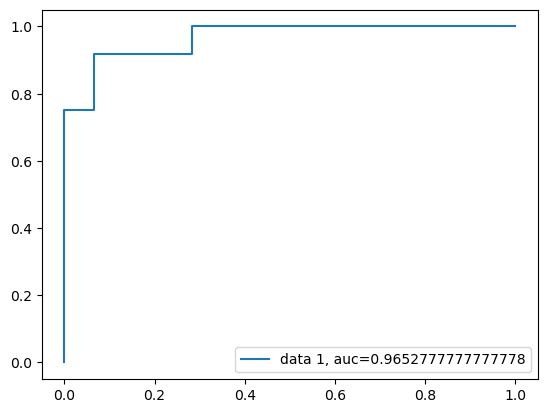


Feature Importance (Coefficient and Odds Ratio):
         Feature  Coefficient  Odds Ratio
4           wins     1.161600    3.195042
1        pass_td     0.173794    1.189811
3  passer_rating     0.079880    1.083157
0  pass_attempts     0.004266    1.004275
2   interception    -0.161924    0.850506


In [110]:
#We now set up our model for quarterbacks with passing yards removed

qb_features = ['pass_attempts', 'pass_td', 'interception', 'passer_rating', 'wins']
qb_x = quarterbacks[qb_features]
qb_y = quarterbacks.All_Pro

qb_x_train, qb_x_test, qb_y_train, qb_y_test = train_test_split(qb_x, qb_y, test_size=0.25, random_state=16)

qblog = LogisticRegression(random_state=16)

qblog.fit(qb_x_train, qb_y_train)

qb_y_predict = qblog.predict(qb_x_test)


target_names = ['All-Pro', 'Not All-Pro']
print(classification_report(qb_y_test, qb_y_predict, target_names=target_names))


y_pred_proba = qblog.predict_proba(qb_x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(qb_y_test,  y_pred_proba)
auc = metrics.roc_auc_score(qb_y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


coefficients = qblog.coef_[0]
odds_ratios = np.exp(coefficients)

feature_importance = pd.DataFrame({
    'Feature': qb_x.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})
print("\nFeature Importance (Coefficient and Odds Ratio):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))

#We see that our model improved!
